# 항공사 지연 요인 분석 보고서

- 25.06.24(화) 오전수업

📦 1. 라이브러리 설치 및 불러오기

### 설치 (처음 한 번만)
- !pip install pandas numpy matplotlib
- (터미널용) pip install pandas numpy matplotlib 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Windows용 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


In [43]:
# 📂 2. 데이터 불러오기

# CSV 파일 경로에 맞게 수정하세요 (로컬 경로)
file_path = "C:/githome/7week_Airdata_project/data/airline_stats.csv"

# 데이터 로드
df = pd.read_csv(file_path)
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [44]:
# 2. 🧼 데이터 정제 및 구조 확인

df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

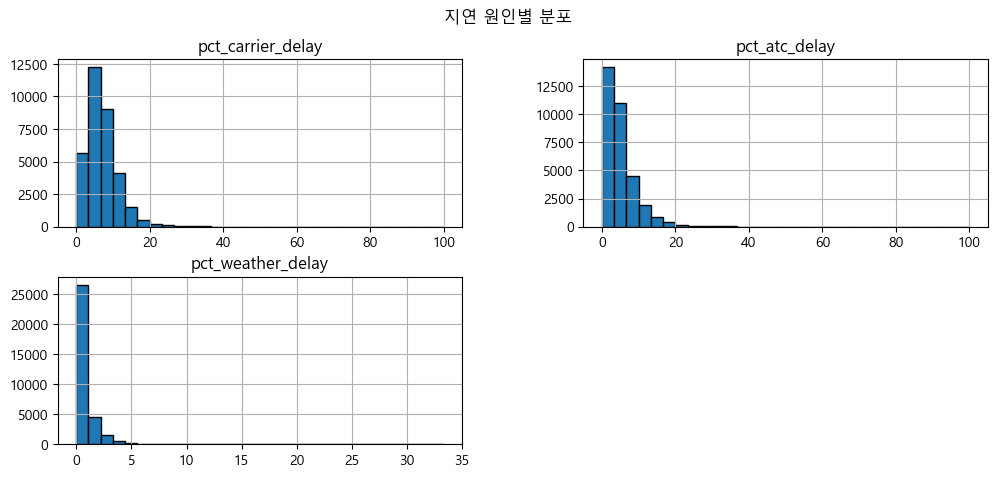

In [45]:
# 3. 📊 변수 분포 확인

import matplotlib.pyplot as plt

df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].hist(
    bins=30, figsize=(12, 5), edgecolor='black'
)
plt.suptitle("지연 원인별 분포")
plt.show()


### 해석:

운항사·관제 지연은 0~15% 내외에 집중

일부 이상치(100%) 존재 → 후속 처리 필요

| 변수               | 상관계수              |
| ---------------- | ----------------- |
| carrier & atc    | **+0.56** → 상관 있음 |
| weather & others | 거의 무관 (기상은 독립적)   |


In [46]:
# 4. 🔗 상관관계 분석
# 운항사 carrier , 관제요인 atc
df.corr(numeric_only=True)



,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


### 🔍 [#4] 상관관계 분석

| 변수 간 상관               | 계수        | 해석                            |
| --------------------- | --------- | ----------------------------- |
| `carrier` ↔ `atc`     | **0.144** | 약한 양의 상관관계 (인적 지연끼리 조금 연결 있음) |
| `carrier` ↔ `weather` | 0.161     | 독립적이라고 보기 어려움                 |
| `atc` ↔ `weather`     | 0.091     | 사실상 무관                        |


- ✅ 결론: 운항사 지연과 관제 지연은 거의 독립적 → 각각 별개로 관리 필요
- ✅ 기상은 다른 요인과 거의 무관하므로 분석 시 제외해도 영향 없음

In [47]:
# 5. 🏢 항공사별 평균 지연율 비교

df.groupby("airline")[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().round(2)


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,3.52,5.47,0.51
American,9.04,5.99,1.12
Delta,6.33,4.46,0.68
Jet Blue,8.08,7.35,0.47
Southwest,7.52,3.15,0.51
United,7.40,5.35,0.68


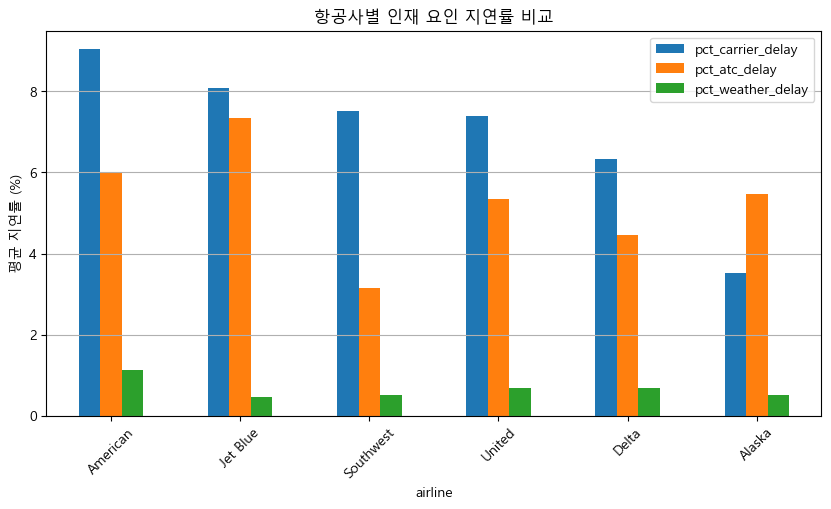

In [48]:
#5 

import matplotlib.pyplot as plt

df_grouped = df.groupby("airline")[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().sort_values('pct_carrier_delay', ascending=False)

df_grouped.plot(kind="bar", figsize=(10, 5))
plt.title("항공사별 인재 요인 지연률 비교")
plt.ylabel("평균 지연률 (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### 🔍 [#5 해석 ] 항공사별 평균 지연율 비교
(특히 운항사 요인 + 관제 요인 중심으로)
| Airline      | Carrier (%) | ATC (%) | 합계 (인재 요인)   |
| ------------ | ----------- | ------- | ------------ |
| **American** | 9.04        | 5.99    | **15.03** 🟥 |
| Jet Blue     | 8.08        | 7.35    | **15.43** 🟥 |
| United       | 7.40        | 5.35    | 12.75        |
| Southwest    | 7.52        | 3.15    | 10.67        |
| Delta        | 6.33        | 4.46    | 10.79        |
| **Alaska**   | 3.52        | 5.47    | **8.99** 🟩  |

- ✅ 인재 요인 지연률이 가장 높은 항공사: Jet Blue, American
- ✅ 가장 낮은 항공사: Alaska

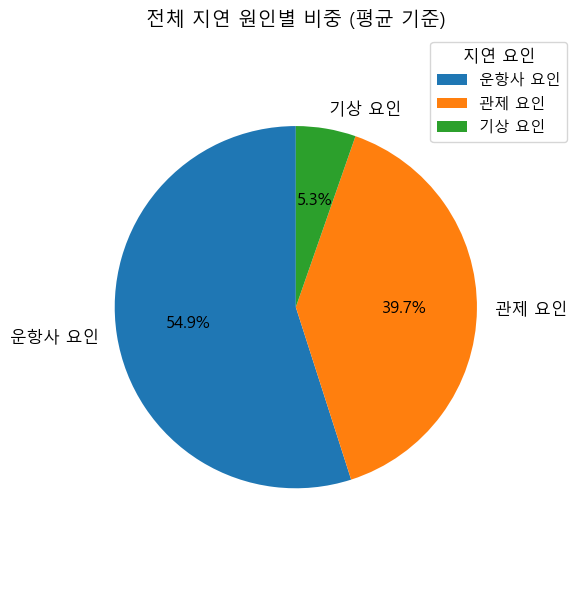

In [49]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 평균 지연율 계산
avg_carrier = df["pct_carrier_delay"].mean()
avg_atc = df["pct_atc_delay"].mean()
avg_weather = df["pct_weather_delay"].mean()

# 데이터 구성
labels = ["운항사 요인", "관제 요인", "기상 요인"]
values = [avg_carrier, avg_atc, avg_weather]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# 파이 차트
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%',
                                   startangle=90, colors=colors, textprops={'fontsize': 12})

# 범례: 오른쪽 위 정렬
plt.legend(wedges, labels, title="지연 요인", loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11, title_fontsize=12)

plt.title("전체 지연 원인별 비중 (평균 기준)", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


### 25.06.24 오전수업 

# 항공사 지연 요인 분석 보고서

## 1. 프로젝트 개요
- **분석 목적**: 항공사의 지연 요인(운항사, 관제, 기상)을 파악하여 개선 방향 제시
- **데이터 출처**: 항공 운항 지연률 데이터 (총 33,468건)
- **분석 대상 변수**:  
  - `pct_carrier_delay`: 운항사 요인
  - `pct_atc_delay`: 관제 요인
  - `pct_weather_delay`: 기상 요인
  - `airline`: 항공사명

### ✅ 분석 관점 요약
- 운항사 & 관제 → 인재 요인

- 기상 → 불가항력 요인

- 따라서 지연율이 낮은 항공사는 내부 운영이 잘되고 있다

- 시각화: 전체 지연의 비율을 Pie Chart로 표현


### 🎯 정책적 시사점 요약
Jet Blue: 관제·운항사 모두 높음 → 인력/시스템 개선 필요

American: 운항사 요인 특히 높음 → 내부 프로세스 재점검 필요

Alaska: 상대적으로 매우 양호 → 우수사례 분석 대상 가능

In [50]:
# 1. 결측치 확인



In [51]:
# 2. 결측치 처리 > 방법 설명


In [52]:
# 3.1 시각적 분석

# 3-1. 히스토그램

# 3-1해석

In [53]:
# 4. 박스플롯

# 4-1. 전체, 항공사별 분석

# 4-1. 분석 결과


In [ ]:
# 5. 추가 분석
# 5-1. 분석결과

In [54]:
# 6. 상관관계 분석
# 6-1. 분석결과

In [55]:
# 7. 공분산 확인
# 7-1. 분석결과

### 8. 분석 결과 정리

### 9. 추가 : 다음 분석 방향 계획